---
Estimación de Parámetros en Ecuaciones Diferenciales Estocásticas (En desarrollo)
---

## Estimación de Parámetros en Ecuaciones Diferenciales Estocásticas

En esta sección, exploraremos cómo simular y estimar parámetros en modelos estocásticos comunes, específicamente:

•	Movimiento Browniano Geométrico (GBM)

•	Movimiento Browniano Aritmético (ABM)

•	Proceso de Reversión a la Media (Proceso de Ornstein-Uhlenbeck)

Usaremos el método de Euler-Maruyama para simular trayectorias de estos procesos y aplicaremos técnicas de estimación para ajustar los parámetros basándonos en la función de verosimilitud.

Para acelerar las simulaciones, utilizaremos numba y su decorador @njit.

### 1. Introducción a las Ecuaciones Diferenciales Estocásticas (EDE)

Las EDE son ecuaciones diferenciales que incorporan términos aleatorios, típicamente modelados como movimiento browniano o ruido blanco. Son fundamentales en áreas como finanzas, física y biología para modelar sistemas donde hay incertidumbre o aleatoriedad inherente.

#### 1.1 Movimiento Browniano Geométrico (GBM)

El GBM es ampliamente utilizado para modelar precios de activos en finanzas. Su ecuación diferencial estocástica es:


$$dS_t = \mu S_t dt + \sigma S_t dW_t$$


donde:

$\quad\quad$ •	 $S_t$  es el precio del activo en el tiempo  t .

$\quad\quad$ •	 $\mu$  es la tasa de crecimiento media.

$\quad\quad$ •	 $\sigma$  es la volatilidad.

$\quad\quad$ •	 $W_t$  es un proceso de Wiener (movimiento browniano estándar).

#### 1.2 Movimiento Browniano Aritmético (ABM)

El ABM es una simplificación donde el término de difusión no depende del valor del proceso:


$$dX_t = \mu dt + \sigma dW_t$$


#### 1.3 Proceso de Ornstein-Uhlenbeck (Reversión a la Media)

Este proceso modela variables que tienden a regresar a una media a lo largo del tiempo:


$$dX_t = \theta (\mu - X_t) dt + \sigma dW_t$$


donde:

$\quad\quad$ •	 $\theta$  es la velocidad de reversión a la media.

$\quad\quad$ •	 $\mu$  es el nivel medio al que el proceso tiende a revertir.

### 2. Método de Euler-Maruyama

El método de Euler-Maruyama es una extensión del método de Euler para resolver EDEs numéricamente. La idea es discretizar el tiempo y aproximar los incrementos del proceso browniano.

Para un EDE general:


$$dX_t = a(X_t, t) dt + b(X_t, t) dW_t$$


La aproximación de Euler-Maruyama es:


$$X_{t+\Delta t} = X_t + a(X_t, t) \Delta t + b(X_t, t) \Delta W_t$$


donde  $\Delta W_t$  es un incremento del movimiento browniano, que en la práctica se simula como:


$$\Delta W_t = \sqrt{\Delta t} \cdot \varepsilon$$


con  $\varepsilon \sim N(0,1)$ .

### 3. Implementación en Python


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from scipy.stats import gaussian_kde
from functools import partial


#### 3.2.1 Movimiento Browniano Geométrico (GBM)

In [2]:
@njit
def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    S = np.zeros(N)
    S[0] = S0
    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        S[i] = S[i-1] + mu * S[i-1] * dt + sigma * S[i-1] * dW
    return np.linspace(0, T, N), S

#### 3.2.2 Movimiento Browniano Aritmético (ABM)

In [3]:
@njit
def simulate_abm(X0, mu, sigma, T, N):
    dt = T / N
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i] = X[i-1] + mu * dt + sigma * dW
    return np.linspace(0, T, N), X

#### 3.2.3 Proceso de Ornstein-Uhlenbeck

In [4]:
@njit
def simulate_ou(X0, theta, mu, sigma, T, N):
    dt = T / N
    X = np.zeros(N)
    X[0] = X0
    for i in range(1, N):
        dW = np.random.normal(0, np.sqrt(dt))
        X[i] = X[i-1] + theta * (mu - X[i-1]) * dt + sigma * dW
    return np.linspace(0, T, N), X

#### 3.3 Simular Trayectorias


In [5]:
# Parámetros comunes
T = 1.0  # Tiempo total
N = 1000  # Número de pasos
np.random.seed(42)  # Para reproducibilidad

# GBM
S0 = 100
mu_gbm = 0.05
sigma_gbm = 0.2
t_gbm, S_gbm = simulate_gbm(S0, mu_gbm, sigma_gbm, T, N)

# ABM
X0 = 0
mu_abm = 0.05
sigma_abm = 0.2
t_abm, X_abm = simulate_abm(X0, mu_abm, sigma_abm, T, N)

# OU
X0_ou = 0
theta_ou = 0.7
mu_ou = 1.0
sigma_ou = 0.3
t_ou, X_ou = simulate_ou(X0_ou, theta_ou, mu_ou, sigma_ou, T, N)

#### 3.4 Visualización de las Trayectorias

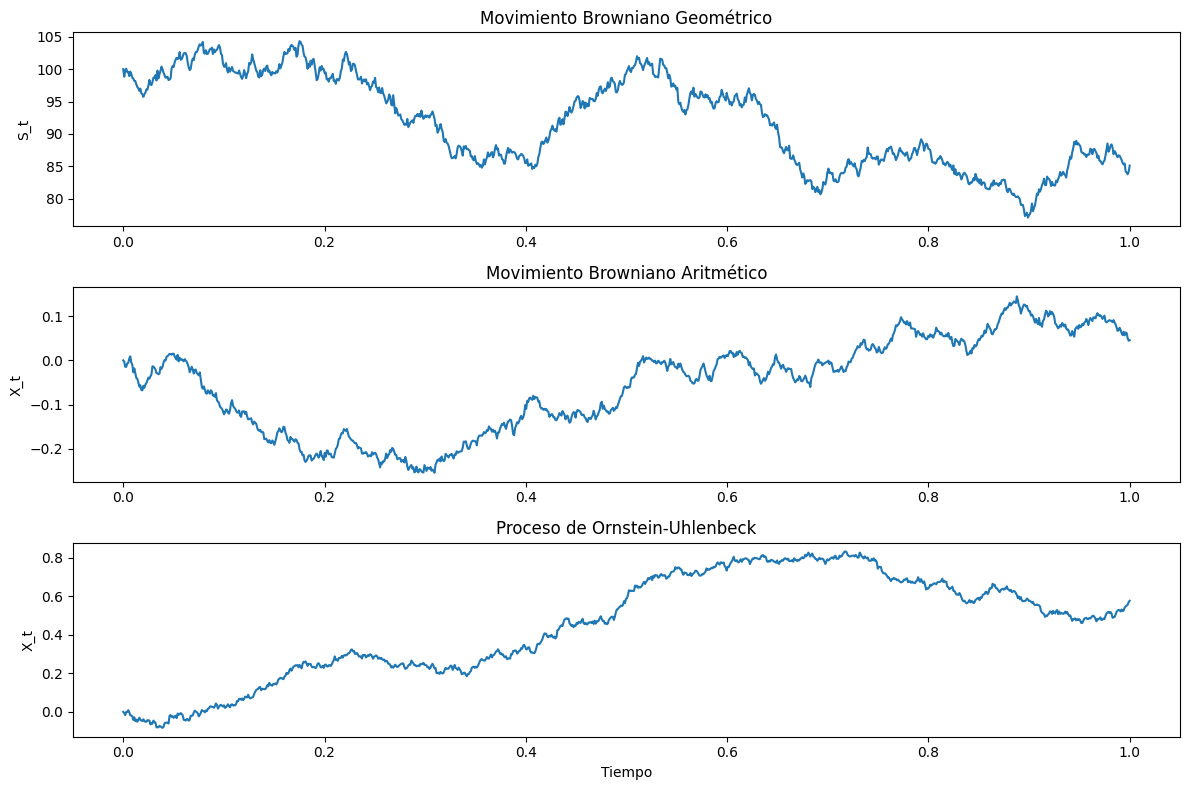

In [6]:
plt.figure(figsize=(12, 8))

# GBM
plt.subplot(3, 1, 1)
plt.plot(t_gbm, S_gbm)
plt.title('Movimiento Browniano Geométrico')
plt.ylabel('S_t')

# ABM
plt.subplot(3, 1, 2)
plt.plot(t_abm, X_abm)
plt.title('Movimiento Browniano Aritmético')
plt.ylabel('X_t')

# OU
plt.subplot(3, 1, 3)
plt.plot(t_ou, X_ou)
plt.title('Proceso de Ornstein-Uhlenbeck')
plt.ylabel('X_t')
plt.xlabel('Tiempo')

plt.tight_layout()
plt.show()

### 4. Estimación de Parámetros en Ecuaciones Diferenciales Estocásticas con Algoritmos Genéticos

En esta sección, implementaremos un algoritmo genético desde cero. Los algoritmos genéticos son métodos de optimización inspirados en el proceso de selección natural y son especialmente útiles para problemas donde el espacio de búsqueda es grande o complejo.

#### 4.1 Construcción de Funciones de Densidad

Usaremos estimación de densidad tipo nucleo para aproximar la distribución de los estados en cada instante.



In [7]:
def estimate_density(data):
    kde = gaussian_kde(data)
    return kde

#### 4.2 Función de Verosimilitud

Definimos la función de verosimilitud como el producto de las densidades evaluadas en los datos observados.
Para evitar problemas numéricos, trabajamos con el logaritmo de la verosimilitud.

In [8]:
def log_likelihood(params, model, data, T, N):
    if model == 'gbm':
        mu, sigma = params
        _, S_sim = simulate_gbm(S0, mu, sigma, T, N)
    elif model == 'abm':
        mu, sigma = params
        _, S_sim = simulate_abm(X0, mu, sigma, T, N)
    elif model == 'ou':
        theta, mu_p, sigma = params
        _, S_sim = simulate_ou(X0_ou, theta, mu_p, sigma, T, N)
    else:
        raise ValueError('Modelo no reconocido')

    kde = estimate_density(S_sim)
    epsilon = 1e-10  # Pequeño valor para evitar log(0)
    likelihoods = kde(data) + epsilon
    log_likelihood_value = np.mean(np.log(likelihoods))
    return -log_likelihood_value  # Negativo para minimizar


#### 4.3 Estimación de Parámetros mediante Algoritmos Genéticos

##### 4.3.1 Introducción a los Algoritmos Genéticos

Los algoritmos genéticos (AG) son métodos de optimización basados en los principios de la evolución biológica. Consisten en una población de posibles soluciones que evoluciona a lo largo de generaciones, aplicando operadores genéticos como selección, cruce (crossover) y mutación.

Los pasos generales de un AG son:

1.	Inicialización: Crear una población inicial de soluciones aleatorias.

2.	Evaluación: Calcular la aptitud (fitness) de cada individuo según una función objetivo.

3.	Selección: Seleccionar individuos para reproducirse basándose en su aptitud.

4.	Crossover: Combinar pares de individuos para producir descendencia.

5.	Mutación: Aplicar pequeñas modificaciones aleatorias a los descendientes.
	
6.	Reemplazo: Formar una nueva generación y repetir el proceso.

#### 4.4 Implementación del Algoritmo Genético

Implementaremos un algoritmo genético para optimizar los parámetros de nuestros modelos estocásticos. El objetivo es minimizar la función de log-verosimilitud negativa.

#### 4.4.1 Definición de la Función de Aptitud

La función de aptitud es esencial en un AG, ya que determina qué tan “buena” es una solución. En nuestro caso, usaremos el logaritmo negativo de la verosimilitud como función de costo, por lo que la aptitud será inversamente proporcional al costo.

In [9]:
def fitness_function(params, model, data, T, N):
    cost = log_likelihood(params, model, data, T, N)
    fitness = np.exp(-cost)
    return fitness

##### 4.4.2 Implementación del AG

Implementaremos el AG con los siguientes componentes:

•	Población: Representada como una matriz donde cada fila es un individuo (un conjunto de parámetros).
	
•	Selección por Ruleta (Roulette Wheel Selection): Probabilidad de ser seleccionado proporcional a la aptitud.

•	Crossover Uniforme: Combinar parámetros de dos padres para crear hijos.

•	Mutación Aleatoria: Añadir pequeñas perturbaciones a los parámetros.

In [10]:
def tournament_selection(population, fitness_values, tournament_size=3):
    selected = []
    population_size = len(population)
    for _ in range(population_size):
        participants_idx = np.random.choice(np.arange(population_size), size=tournament_size, replace=False)
        participants_fitness = fitness_values[participants_idx]
        winner_idx = participants_idx[np.argmax(participants_fitness)]
        selected.append(population[winner_idx])
    return np.array(selected)

def crossover(parent1, parent2):
    alpha = np.random.rand(len(parent1))
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = alpha * parent2 + (1 - alpha) * parent1
    return child1, child2

def mutate(individual, bounds, mutation_rate):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            # Mutación gaussiana
            mutation = np.random.normal(0, 0.1 * (bounds[i][1] - bounds[i][0]))
            individual[i] += mutation
            # Asegurar que el valor esté dentro de los límites
            individual[i] = np.clip(individual[i], bounds[i][0], bounds[i][1])
    return individual

In [11]:
def genetic_algorithm(fitness_function, bounds, population_size=100, generations=500, mutation_rate=0.3, elitism=True):
    num_params = len(bounds)
    # Inicialización de la población
    population = np.random.rand(population_size, num_params)
    for i in range(num_params):
        population[:, i] = bounds[i][0] + population[:, i] * (bounds[i][1] - bounds[i][0])

    best_fitness_history = []
    best_individual = None
    best_fitness = -np.inf

    for gen in range(generations):
        # Evaluación de la aptitud
        fitness_values = np.array([fitness_function(ind) for ind in population])

        # Actualizar el mejor individuo
        current_best_fitness = np.max(fitness_values)
        current_best_individual = population[np.argmax(fitness_values)]
        if current_best_fitness > best_fitness:
            best_fitness = current_best_fitness
            best_individual = current_best_individual

        best_fitness_history.append(best_fitness)

        # Selección por torneo
        selected = tournament_selection(population, fitness_values)

        # Crossover
        offspring = np.empty_like(population)
        for i in range(0, population_size, 2):
            parent1 = selected[i]
            parent2 = selected[(i+1) % population_size]
            child1, child2 = crossover(parent1, parent2)
            offspring[i] = child1
            offspring[(i+1) % population_size] = child2

        # Mutación
        for i in range(population_size):
            offspring[i] = mutate(offspring[i], bounds, mutation_rate)

        # Implementar elitismo
        if elitism:
            # Reemplazar al peor individuo de la nueva generación por el mejor de la anterior
            worst_idx = np.argmin([fitness_function(ind) for ind in offspring])
            offspring[worst_idx] = best_individual

        # Reemplazo
        population = offspring

        print(f"Generación {gen+1}: Mejor Aptitud = {best_fitness}")

    # Gráfica de la aptitud
    plt.figure(figsize=(10, 6))
    plt.plot(best_fitness_history)
    plt.title('Evolución de la Mejor Aptitud')
    plt.xlabel('Generación')
    plt.ylabel('Aptitud')
    plt.show()

    return best_individual

#### 4.5 Optimización de Parámetros con el AG

Ahora aplicaremos el AG para estimar los parámetros de cada modelo.

##### 4.5.1 Movimiento Browniano Geométrico (GBM)

Configuración del AG

Estimación de parámetros para GBM
Generación 1: Mejor Aptitud = 0.01705204159656125
Generación 2: Mejor Aptitud = 0.017515780160061174
Generación 3: Mejor Aptitud = 0.017515780160061174
Generación 4: Mejor Aptitud = 0.017515780160061174
Generación 5: Mejor Aptitud = 0.017515780160061174
Generación 6: Mejor Aptitud = 0.018142913592497603
Generación 7: Mejor Aptitud = 0.018142913592497603
Generación 8: Mejor Aptitud = 0.018210038515976867
Generación 9: Mejor Aptitud = 0.018602015230105816
Generación 10: Mejor Aptitud = 0.018602015230105816
Generación 11: Mejor Aptitud = 0.01963567105594386
Generación 12: Mejor Aptitud = 0.01963567105594386
Generación 13: Mejor Aptitud = 0.01963567105594386
Generación 14: Mejor Aptitud = 0.01963567105594386
Generación 15: Mejor Aptitud = 0.01963567105594386
Generación 16: Mejor Aptitud = 0.01963567105594386
Generación 17: Mejor Aptitud = 0.01963567105594386
Generación 18: Mejor Aptitud = 0.01963567105594386
Generación 19: Mejor Aptitud = 0.019635671055943

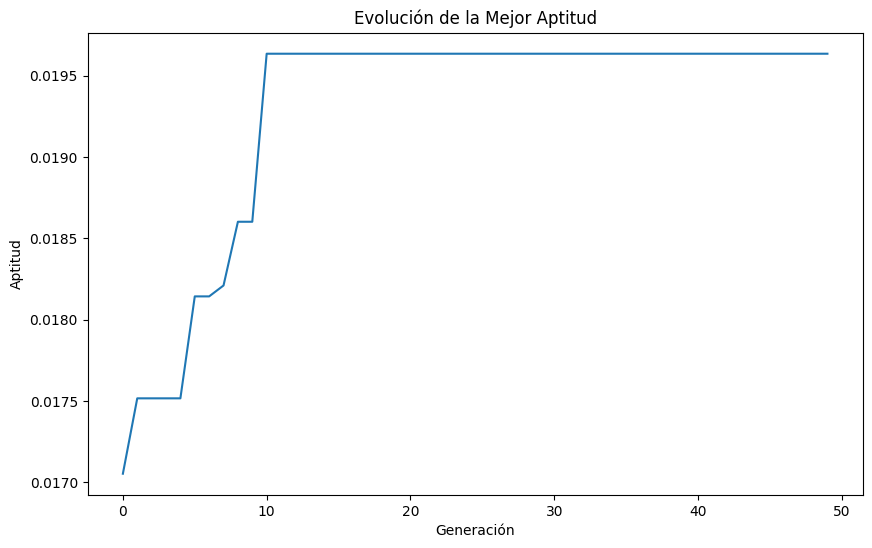

Parámetros reales GBM: mu = 0.05, sigma = 0.2
Parámetros estimados GBM: mu = 0.06195048732732238, sigma = 0.30174948115207323


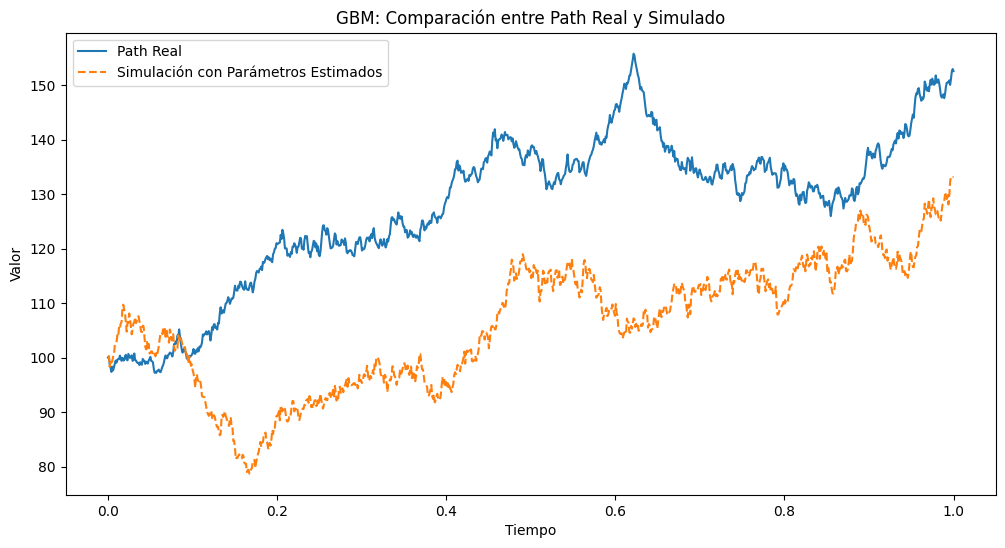

In [12]:
# Parámetros comunes
T = 1.0    # Tiempo total
N = 1000   # Número de pasos
np.random.seed(42)  # Para reproducibilidad

# GBM
S0 = 100
mu_gbm_real = 0.05
sigma_gbm_real = 0.2
t_gbm, S_gbm = simulate_gbm(S0, mu_gbm_real, sigma_gbm_real, T, N)

print("Estimación de parámetros para GBM")

# Datos observados
data_gbm = S_gbm

# Crear la función de aptitud específica para GBM
fitness_gbm = partial(fitness_function, model='gbm', data=data_gbm, T=T, N=N)

# Límites de los parámetros: (mu, sigma)
bounds_gbm = [(0.0, 0.1),  # mu
              (0.1, 0.5)]  # sigma

# Ejecutar el algoritmo genético
best_params_gbm = genetic_algorithm(fitness_gbm, bounds_gbm,
                                    population_size=50, generations=50, mutation_rate=0.1, elitism=True)

mu_gbm_est, sigma_gbm_est = best_params_gbm

print(f"Parámetros reales GBM: mu = {mu_gbm_real}, sigma = {sigma_gbm_real}")
print(f"Parámetros estimados GBM: mu = {mu_gbm_est}, sigma = {sigma_gbm_est}")

# Simulación con parámetros estimados
_, S_gbm_est = simulate_gbm(S0, mu_gbm_est, sigma_gbm_est, T, N)

# Visualización del path real y el simulado
plt.figure(figsize=(12, 6))
plt.plot(t_gbm, S_gbm, label='Path Real')
plt.plot(t_gbm, S_gbm_est, label='Simulación con Parámetros Estimados', linestyle='--')
plt.title('GBM: Comparación entre Path Real y Simulado')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()


##### 4.5.2 Movimiento Browniano Aritmético (ABM)



Estimación de parámetros para ABM
Generación 1: Mejor Aptitud = 0.8736870059041066
Generación 2: Mejor Aptitud = 0.8745363646368942
Generación 3: Mejor Aptitud = 1.1079195077653594
Generación 4: Mejor Aptitud = 1.1620174269050947
Generación 5: Mejor Aptitud = 1.18415434198275
Generación 6: Mejor Aptitud = 1.18415434198275
Generación 7: Mejor Aptitud = 1.18415434198275
Generación 8: Mejor Aptitud = 1.18415434198275
Generación 9: Mejor Aptitud = 1.2070840065752648
Generación 10: Mejor Aptitud = 1.2070840065752648
Generación 11: Mejor Aptitud = 1.224055997254
Generación 12: Mejor Aptitud = 1.224055997254
Generación 13: Mejor Aptitud = 1.224055997254
Generación 14: Mejor Aptitud = 1.224055997254
Generación 15: Mejor Aptitud = 1.224055997254
Generación 16: Mejor Aptitud = 1.224055997254
Generación 17: Mejor Aptitud = 1.224055997254
Generación 18: Mejor Aptitud = 1.2346328142032785
Generación 19: Mejor Aptitud = 1.2346328142032785
Generación 20: Mejor Aptitud = 1.2346328142032785
Generación

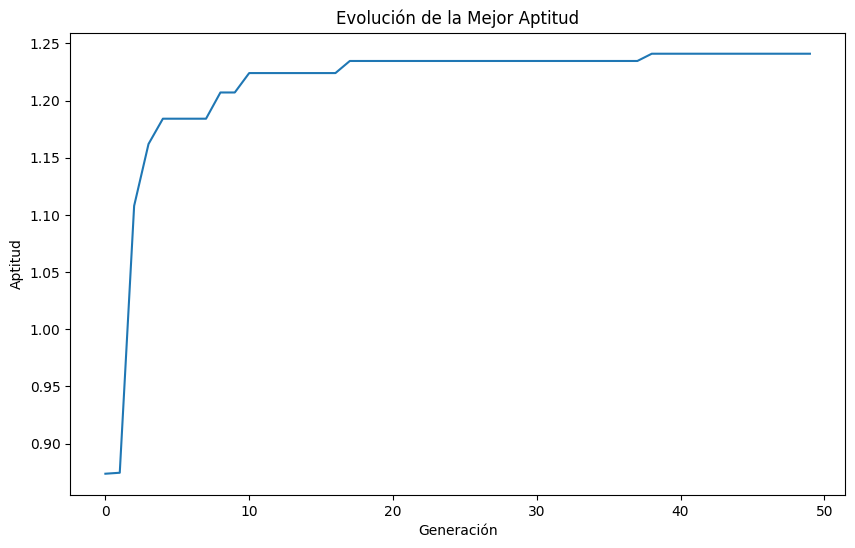

Parámetros reales ABM: mu = 0.05, sigma = 0.2
Parámetros estimados ABM: mu = -0.0015520114668656185, sigma = 0.397662491157077


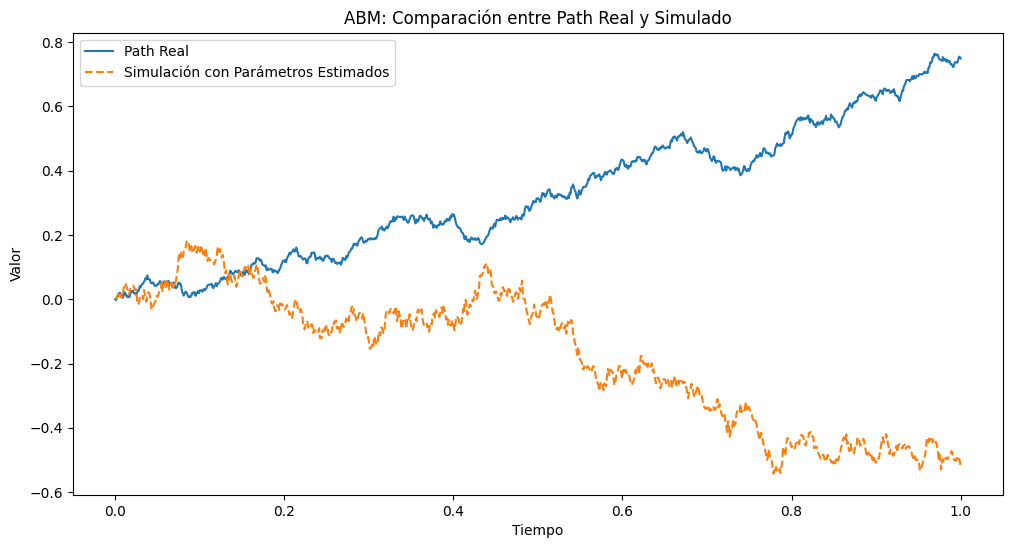

In [13]:
# ABM
X0 = 0
mu_abm_real = 0.05
sigma_abm_real = 0.2
t_abm, X_abm = simulate_abm(X0, mu_abm_real, sigma_abm_real, T, N)

print("\nEstimación de parámetros para ABM")

# Datos observados
data_abm = X_abm

# Crear la función de aptitud específica para ABM
fitness_abm = partial(fitness_function, model='abm', data=data_abm, T=T, N=N)

# Límites de los parámetros: (mu, sigma)
bounds_abm = [(-0.1, 0.1),  # mu
              (0.1, 0.5)]   # sigma

# Ejecutar el algoritmo genético
best_params_abm = genetic_algorithm(fitness_abm, bounds_abm,
                                    population_size=50, generations=50, mutation_rate=0.1, elitism=True)

mu_abm_est, sigma_abm_est = best_params_abm

print(f"Parámetros reales ABM: mu = {mu_abm_real}, sigma = {sigma_abm_real}")
print(f"Parámetros estimados ABM: mu = {mu_abm_est}, sigma = {sigma_abm_est}")


# Simulación con parámetros estimados
_, X_abm_est = simulate_abm(X0, mu_abm_est, sigma_abm_est, T, N)

# Visualización del path real y el simulado
plt.figure(figsize=(12, 6))
plt.plot(t_abm, X_abm, label='Path Real')
plt.plot(t_abm, X_abm_est, label='Simulación con Parámetros Estimados', linestyle='--')
plt.title('ABM: Comparación entre Path Real y Simulado')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

##### 4.5.3 Proceso de Ornstein-Uhlenbeck (OU)



Estimación de parámetros para OU
Generación 1: Mejor Aptitud = 1.2940693660187346
Generación 2: Mejor Aptitud = 1.3013346588760744
Generación 3: Mejor Aptitud = 1.3013346588760744
Generación 4: Mejor Aptitud = 1.3591322870026223
Generación 5: Mejor Aptitud = 1.3591322870026223
Generación 6: Mejor Aptitud = 1.3591322870026223
Generación 7: Mejor Aptitud = 1.3591322870026223
Generación 8: Mejor Aptitud = 1.3591322870026223
Generación 9: Mejor Aptitud = 1.3591322870026223
Generación 10: Mejor Aptitud = 1.3591322870026223
Generación 11: Mejor Aptitud = 1.3591322870026223
Generación 12: Mejor Aptitud = 1.3591322870026223
Generación 13: Mejor Aptitud = 1.3591322870026223
Generación 14: Mejor Aptitud = 1.3745820091153111
Generación 15: Mejor Aptitud = 1.3785826963137235
Generación 16: Mejor Aptitud = 1.3785826963137235
Generación 17: Mejor Aptitud = 1.3785826963137235
Generación 18: Mejor Aptitud = 1.3785826963137235
Generación 19: Mejor Aptitud = 1.3785826963137235
Generación 20: Mejor Apti

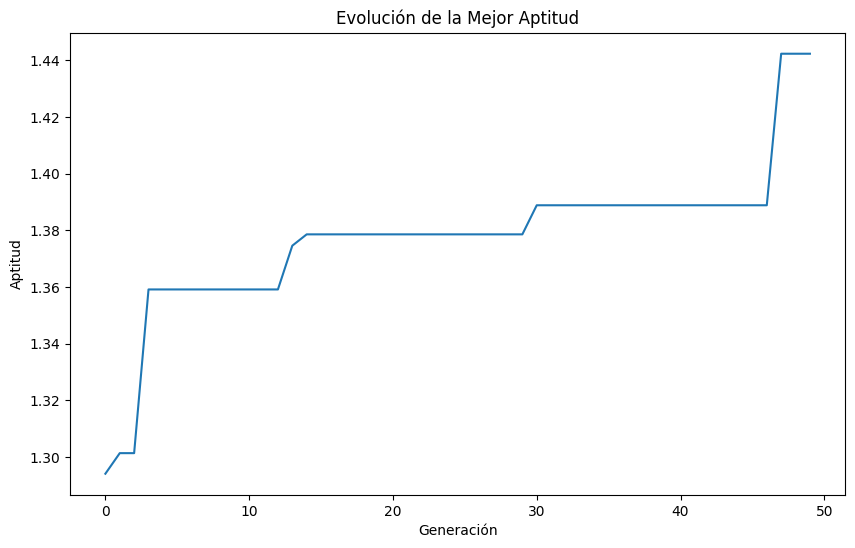

Parámetros reales OU: theta = 0.7, mu = 1.0, sigma = 0.3
Parámetros estimados OU: theta = 0.6531188156555873, mu = 1.4870227725978236, sigma = 0.19879435966050435


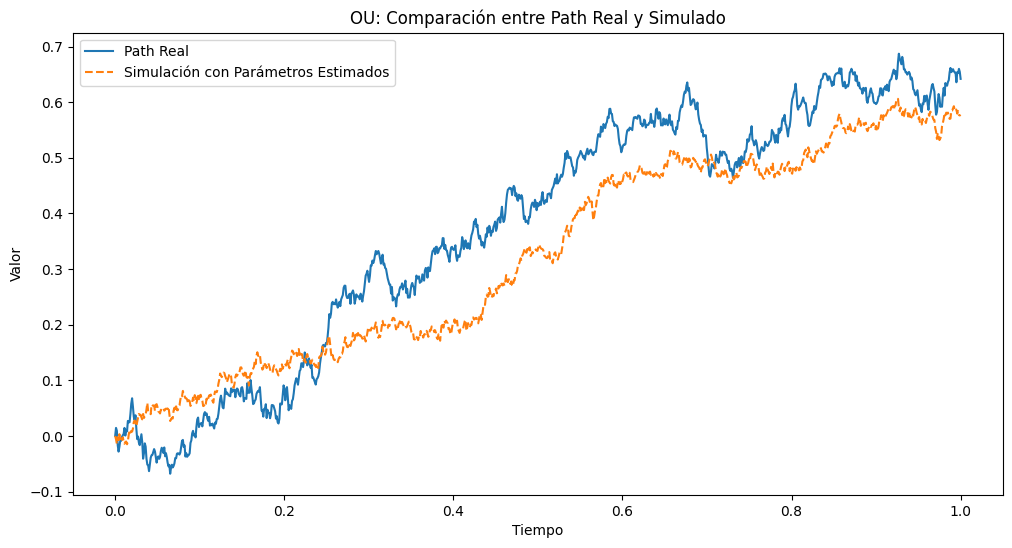

In [14]:
# OU
X0_ou = 0
theta_ou_real = 0.7
mu_ou_real = 1.0
sigma_ou_real = 0.3
t_ou, X_ou = simulate_ou(X0_ou, theta_ou_real, mu_ou_real, sigma_ou_real, T, N)

print("\nEstimación de parámetros para OU")

# Datos observados
data_ou = X_ou

# Crear la función de aptitud específica para OU
fitness_ou = partial(fitness_function, model='ou', data=data_ou, T=T, N=N)

# Límites de los parámetros: (theta, mu, sigma)
bounds_ou = [(0.1, 1.0),   # theta
             (-1.0, 2.0),  # mu
             (0.1, 0.5)]   # sigma

# Ejecutar el algoritmo genético
best_params_ou = genetic_algorithm(fitness_ou, bounds_ou,
                                   population_size=50, generations=50, mutation_rate=0.1, elitism=True)

theta_ou_est, mu_ou_est, sigma_ou_est = best_params_ou

print(f"Parámetros reales OU: theta = {theta_ou_real}, mu = {mu_ou_real}, sigma = {sigma_ou_real}")
print(f"Parámetros estimados OU: theta = {theta_ou_est}, mu = {mu_ou_est}, sigma = {sigma_ou_est}")

# Simulación con parámetros estimados
_, X_ou_est = simulate_ou(X0_ou, theta_ou_est, mu_ou_est, sigma_ou_est, T, N)

# Visualización del path real y el simulado
plt.figure(figsize=(12, 6))
plt.plot(t_ou, X_ou, label='Path Real')
plt.plot(t_ou, X_ou_est, label='Simulación con Parámetros Estimados', linestyle='--')
plt.title('OU: Comparación entre Path Real y Simulado')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

##### 4.5.4 Cálculo de la Log-Verosimilitud

Una vez obtenidos los parámetros, podemos calcular la log-verosimilitud:

In [15]:
# Cálculo de las log-verosimilitudes
ll_gbm = -log_likelihood([mu_gbm_est, sigma_gbm_est], 'gbm', data_gbm, T, N)
ll_abm = -log_likelihood([mu_abm_est, sigma_abm_est], 'abm', data_abm, T, N)
ll_ou = -log_likelihood([theta_ou_est, mu_ou_est, sigma_ou_est], 'ou', data_ou, T, N)

print("\nLog-Verosimilitudes:")
print(f"GBM: {ll_gbm}")
print(f"ABM: {ll_abm}")
print(f"OU: {ll_ou}")

# Determinar el modelo más verosímil
models = ['GBM', 'ABM', 'OU']
log_likelihoods = [ll_gbm, ll_abm, ll_ou]

best_model_index = np.argmax(log_likelihoods)
best_model = models[best_model_index]

print(f"\nEl modelo más verosímil es: {best_model}")


Log-Verosimilitudes:
GBM: -4.2228977193095
ABM: -0.28538241115267393
OU: 0.2994876601703014

El modelo más verosímil es: OU


### 4.6 Generar múltiples simulaciones con parámetros estimados

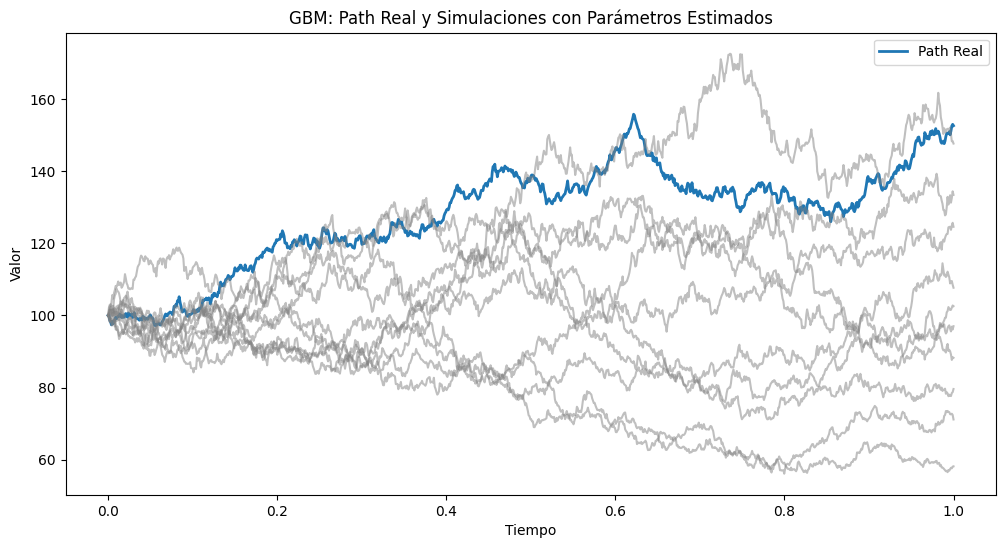

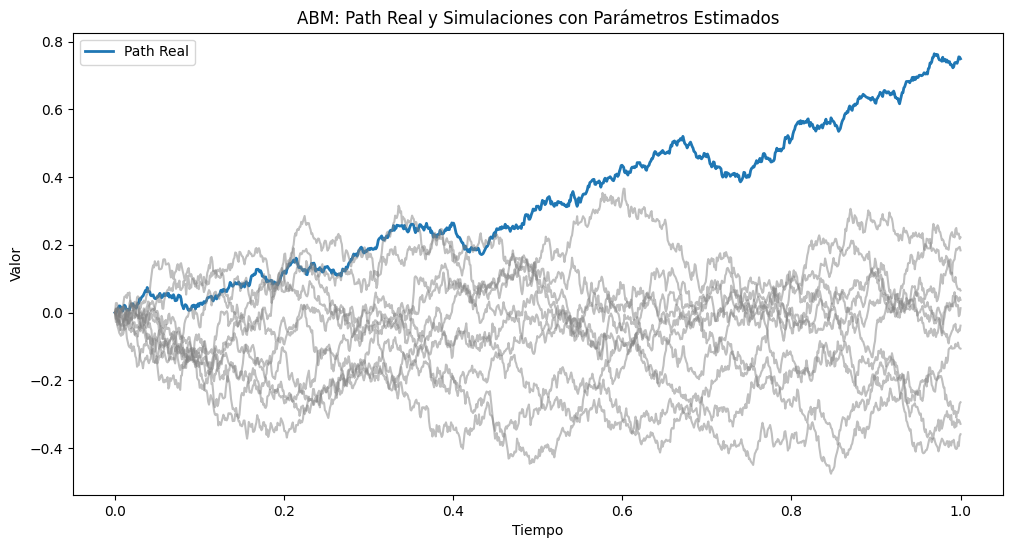

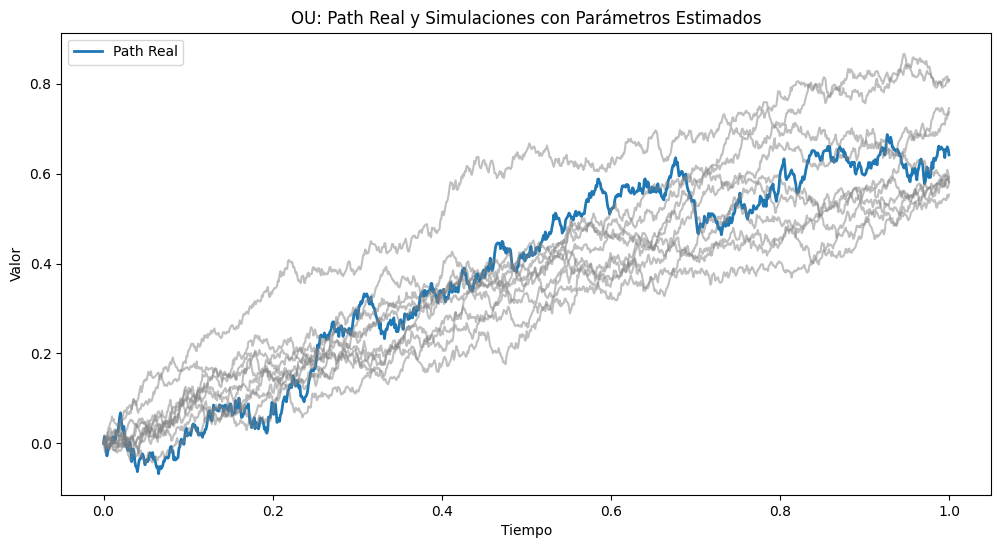

In [16]:
num_simulations = 10
plt.figure(figsize=(12, 6))
plt.plot(t_gbm, S_gbm, label='Path Real', linewidth=2)
for _ in range(num_simulations):
    _, S_sim = simulate_gbm(S0, mu_gbm_est, sigma_gbm_est, T, N)
    plt.plot(t_gbm, S_sim, color='gray', alpha=0.5)
plt.title('GBM: Path Real y Simulaciones con Parámetros Estimados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_abm, X_abm, label='Path Real', linewidth=2)
for _ in range(num_simulations):
    _, X_sim = simulate_abm(X0, mu_abm_est, sigma_abm_est, T, N)
    plt.plot(t_abm, X_sim, color='gray', alpha=0.5)
plt.title('ABM: Path Real y Simulaciones con Parámetros Estimados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_ou, X_ou, label='Path Real', linewidth=2)
for _ in range(num_simulations):
    _, X_sim = simulate_ou(X0_ou, theta_ou_est, mu_ou_est, sigma_ou_est, T, N)
    plt.plot(t_ou, X_sim, color='gray', alpha=0.5)
plt.title('OU: Path Real y Simulaciones con Parámetros Estimados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

#### 4.7 Funciones de verosimilitud exactas

In [17]:
def log_likelihood_gbm(params, data, T, N):
    mu, sigma = params
    dt = T / N
    S = data
    log_likelihood = 0.0
    for i in range(1, len(S)):
        drift = (mu - 0.5 * sigma ** 2) * dt
        diffusion = sigma * np.sqrt(dt)
        expected_log_return = drift
        observed_log_return = np.log(S[i] / S[i-1])
        variance = diffusion ** 2
        log_likelihood += -0.5 * np.log(2 * np.pi * variance) - ((observed_log_return - expected_log_return) ** 2) / (2 * variance)
    return -log_likelihood

def log_likelihood_abm(params, data, T, N):
    mu, sigma = params
    dt = T / N
    X = data
    log_likelihood = 0.0
    for i in range(1, len(X)):
        expected = X[i-1] + mu * dt
        variance = sigma ** 2 * dt
        observed = X[i]
        log_likelihood += -0.5 * np.log(2 * np.pi * variance) - ((observed - expected) ** 2) / (2 * variance)
    return -log_likelihood

def log_likelihood_ou(params, data, T, N):
    theta, mu_param, sigma = params
    dt = T / N
    X = data
    log_likelihood = 0.0
    for i in range(1, len(X)):
        expected = mu_param + (X[i-1] - mu_param) * np.exp(-theta * dt)
        variance = (sigma ** 2) / (2 * theta) * (1 - np.exp(-2 * theta * dt))
        observed = X[i]
        log_likelihood += -0.5 * np.log(2 * np.pi * variance) - ((observed - expected) ** 2) / (2 * variance)
    return -log_likelihood

# 4. Definir las funciones objetivo

def objective_function_gbm(params):
    return log_likelihood_gbm(params, data_gbm, T, N)

def objective_function_abm(params):
    return log_likelihood_abm(params, data_abm, T, N)

def objective_function_ou(params):
    return log_likelihood_ou(params, data_ou, T, N)

# 5. Optimización local con scipy.optimize.minimize

from scipy.optimize import minimize

# Límites de los parámetros
bounds_gbm = [(0.0, None), (1e-6, None)]
bounds_abm = [(None, None), (1e-6, None)]
bounds_ou = [(1e-6, None), (None, None), (1e-6, None)]

# 5.1 GBM
print("\nRefinamiento de parámetros para GBM utilizando L-BFGS-B")
x0_gbm = best_params_gbm
result_gbm = minimize(objective_function_gbm, x0_gbm, method='L-BFGS-B', bounds=bounds_gbm)
mu_gbm_refined, sigma_gbm_refined = result_gbm.x
print(f"Parámetros refinados GBM: mu = {mu_gbm_refined}, sigma = {sigma_gbm_refined}")
print(f"Parámetros reales GBM: mu = {mu_gbm_real}, sigma = {sigma_gbm_real}")


# 5.2 ABM
print("\nRefinamiento de parámetros para ABM utilizando L-BFGS-B")
x0_abm = best_params_abm
result_abm = minimize(objective_function_abm, x0_abm, method='L-BFGS-B', bounds=bounds_abm)
mu_abm_refined, sigma_abm_refined = result_abm.x
print(f"Parámetros refinados ABM: mu = {mu_abm_refined}, sigma = {sigma_abm_refined}")
print(f"Parámetros reales ABM: mu = {mu_abm_real}, sigma = {sigma_abm_real}")


# 5.3 OU
print("\nRefinamiento de parámetros para OU utilizando L-BFGS-B")
x0_ou = best_params_ou
result_ou = minimize(objective_function_ou, x0_ou, method='L-BFGS-B', bounds=bounds_ou)
theta_ou_refined, mu_ou_refined, sigma_ou_refined = result_ou.x
print(f"Parámetros refinados OU: theta = {theta_ou_refined}, mu = {mu_ou_refined}, sigma = {sigma_ou_refined}")
print(f"Parámetros reales OU: theta = {theta_ou_real}, mu = {mu_ou_real}, sigma = {sigma_ou_real}")





Refinamiento de parámetros para GBM utilizando L-BFGS-B
Parámetros refinados GBM: mu = 0.4419927555717823, sigma = 0.19564649697941197
Parámetros reales GBM: mu = 0.05, sigma = 0.2

Refinamiento de parámetros para ABM utilizando L-BFGS-B
Parámetros refinados ABM: mu = 0.7499375145793554, sigma = 0.20333189353069875
Parámetros reales ABM: mu = 0.05, sigma = 0.2

Refinamiento de parámetros para OU utilizando L-BFGS-B
Parámetros refinados OU: theta = 1.5509437644059163, mu = 0.7876927891888655, sigma = 0.3018566370119983
Parámetros reales OU: theta = 0.7, mu = 1.0, sigma = 0.3


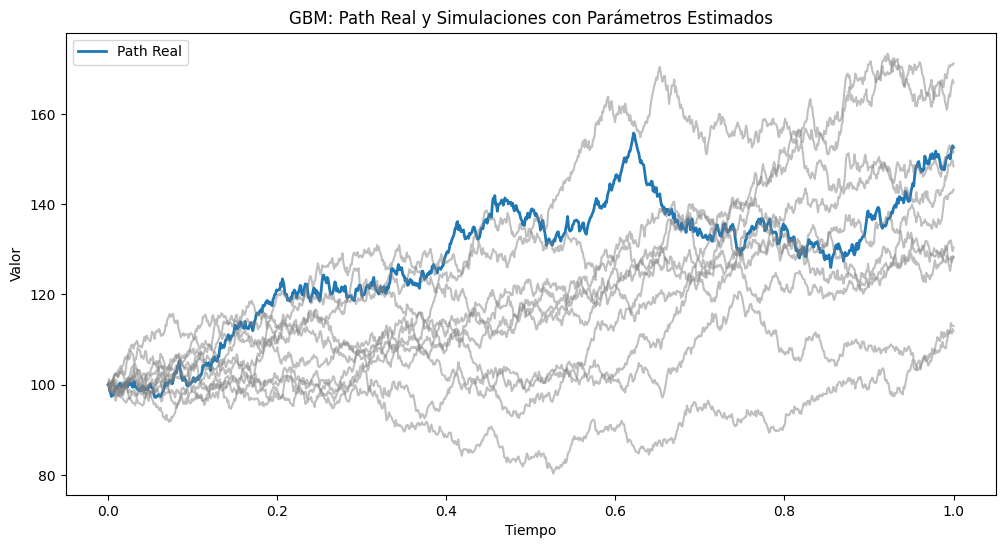

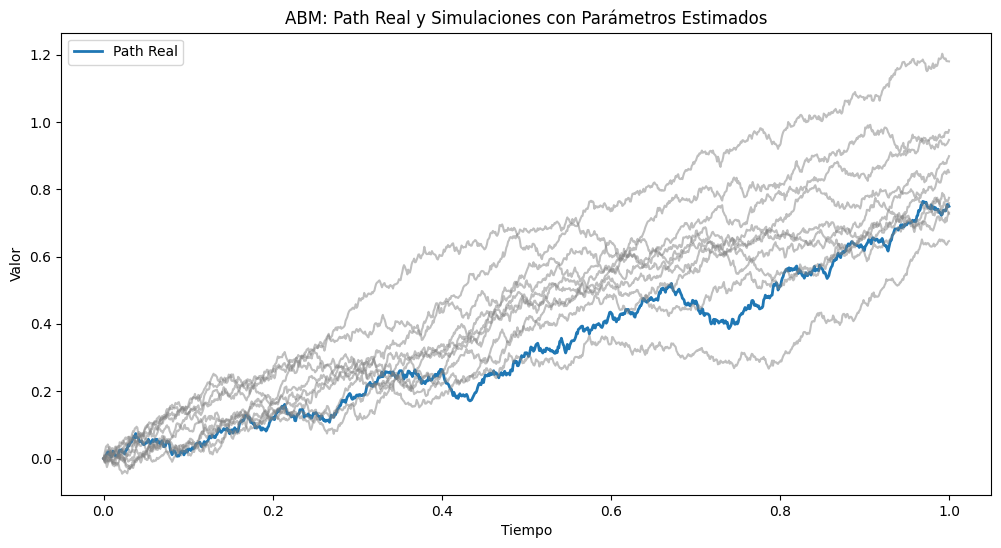

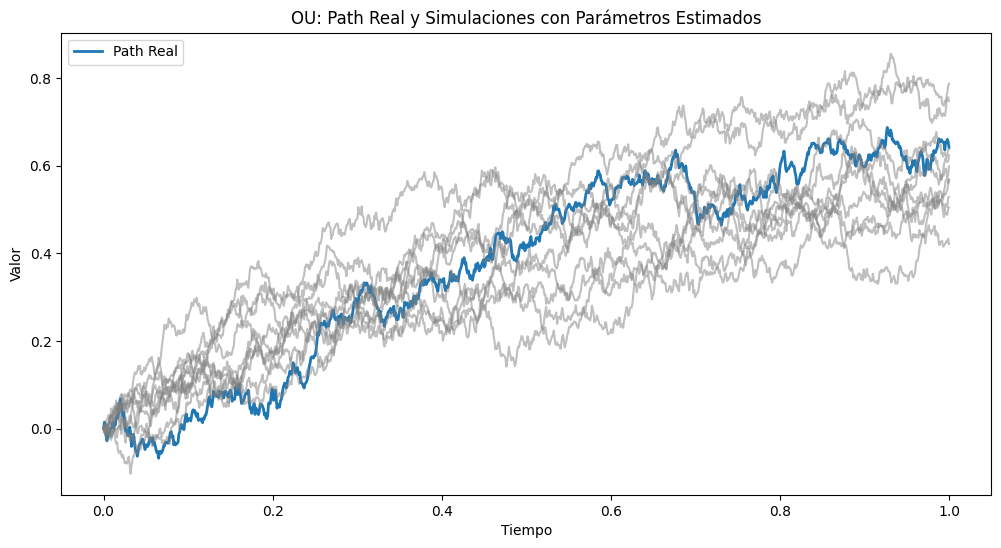

In [18]:
num_simulations = 10
plt.figure(figsize=(12, 6))
plt.plot(t_gbm, S_gbm, label='Path Real', linewidth=2)
for _ in range(num_simulations):
    _, S_sim = simulate_gbm(S0, mu_gbm_refined, sigma_gbm_refined, T, N)
    plt.plot(t_gbm, S_sim, color='gray', alpha=0.5)
plt.title('GBM: Path Real y Simulaciones con Parámetros Estimados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_abm, X_abm, label='Path Real', linewidth=2)
for _ in range(num_simulations):
    _, X_sim = simulate_abm(X0, mu_abm_refined, sigma_abm_refined, T, N)
    plt.plot(t_abm, X_sim, color='gray', alpha=0.5)
plt.title('ABM: Path Real y Simulaciones con Parámetros Estimados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(t_ou, X_ou, label='Path Real', linewidth=2)
for _ in range(num_simulations):
    _, X_sim = simulate_ou(X0_ou, theta_ou_refined, mu_ou_refined, sigma_ou_refined, T, N)
    plt.plot(t_ou, X_sim, color='gray', alpha=0.5)
plt.title('OU: Path Real y Simulaciones con Parámetros Estimados')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()